In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#L is a legnth 
L=10
#N is the number of divisions
N=100
#dx will be used as delta x
dx = L/(N-1)
#dt is delta t
dt = 0.01
#P is the amount of time spent
P = 10
#num_steps is the number of iterations within that period we will calculate
num_steps = int(P/dt)

k=5
#setting up our meshgrid 
x = np.linspace(0,L,N)
y = np.linspace(0,L,N)
X, Y = np.meshgrid(x, y)
#setting up boundary conditions for the top bottom and sides of the box
Top = np.zeros(N)
Bottom = np.zeros(N)
Left = np.zeros(N)
Right = np.zeros(N)
#the intiial condition, which is just a 2d np array
Init = np.cos(2*(X-5)**2+2*(Y-5)**2)
T=np.zeros((N,N))

 <h2><center>Purpose</center></h2>
<h3><center>The following code approximates a solution for the 2d heat equation with boundary and initial conditions</center></h3>

$$
    \frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}  \right)
$$
<h3><center>We can approximate the heat equation by descritizing the differential equation like so:</center></h3>
$$
    \frac{u_{i,j,k}^{n+1} - u_{i,j,k}^n}{\Delta t} = \alpha \left( 
\frac{u_{i+1,j,k}^n - 2u_{i,j,k}^n + u_{i-1,j,k}^n}{\Delta x^2} +
\frac{u_{i,j+1,k}^n - 2u_{i,j,k}^n + u_{i,j-1,k}^n}{\Delta y^2} 
\right)
$$

In [22]:
#The following algorithm goes through each square and finds what temperature it should be based on what it was before 
#and what its neighbor's are at it uses the approximation above to solve for u^
T_before = T
T_next = np.zeros((N,N,num_steps))
T = Init
for n in range(num_steps):

    for i in range (N):
        for j in range(N):
            T[i,j]=(k*dt**2/dx**2)*(-2*T[i,j])+(k*dt**2/dx**2)*(-2*T[i,j])+(2*T[i,j])-T_before[i,j]
            if i==0:
                T[i,j]+=(k*dt**2/dx**2)*Left[i]
            else:
                T[i,j]+=(k*dt**2/dx**2)* T[i-1,j]
            if i==(N-1):
                 T[i,j]+=(k*dt**2/dx**2)*Right[i]
            else:
                T[i,j]+=(k*dt**2/dx**2)* T[i+1,j]
            if j==0:
                T[i,j]+=(k*dt**2/dx**2)*Top[j]
            else:
                T[i,j]+=(k*dt**2/dx**2)* T[i,j-1]
            if j==(N-1):
                 T[i,j]+=(k*dt**2/dx**2)*Bottom[j]
            else:
                T[i,j]+=(k*dt**2/dx**2)* T[i,j+1]
            T_next[i,j,n]=T[i,j]
            T_before[i,j] = T[i,j]
                    

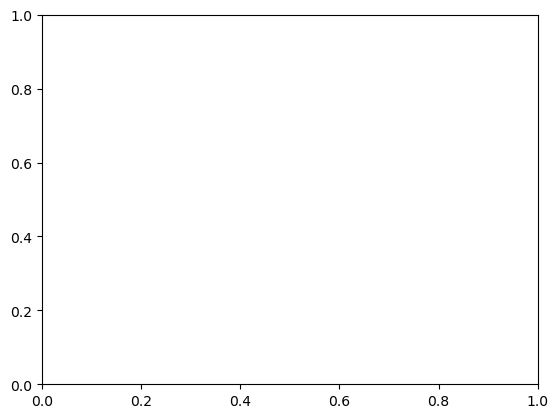

In [23]:
fig, ax = plt.subplots()
cbar = None

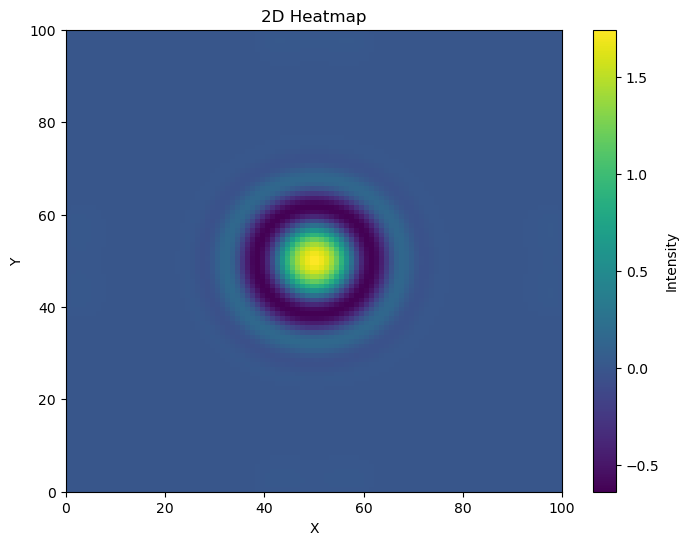

In [24]:
#below is a plot of the initial condition
plt.figure(figsize=(8, 6))
plt.imshow(T_next[:,:,100], extent=(0, 100, 0, 100), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Intensity")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Heatmap")
plt.show()

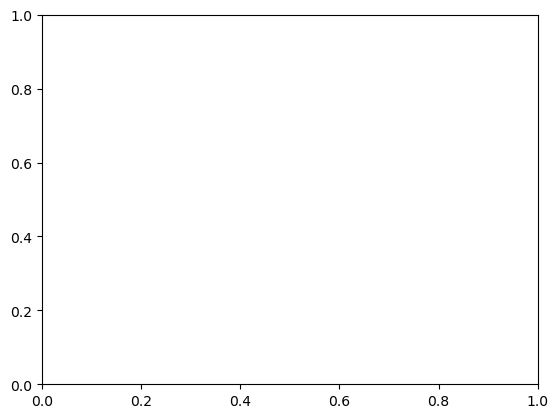

In [25]:
#2D animation
heatmap = ax.imshow(T_next[:,:,10], extent=(0, 100, 0, 100), origin='lower', cmap='viridis', aspect='auto')
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Intensity')

def update(t):
    #returns a heatmap at each iteration
    heatmap.set_array(T_next[:,:,t])
    return[heatmap]
    #takes in the update function and puts the amount of steps as the frames
ani = FuncAnimation(fig, update, frames=int(num_steps/2), blit=True, interval=2)

ani.save('2d_heatmap_animation.gif', writer='pillow', fps=20)